In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv")

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.shape

(614, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

we have to remove null values

In [7]:
df["Gender"].fillna('Male',inplace=True)
df["Married"].fillna('Yes',inplace=True)
df["Dependents"].fillna(0,inplace=True)
df["Self_Employed"].fillna('No',inplace=True)
df['LoanAmount'].fillna(120.0,inplace=True)
df['Loan_Amount_Term'].fillna(360.0,inplace=True)
df['Credit_History'].fillna(1.0,inplace=True)

we have  removed null values

In [8]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [9]:
#dropin unecessary column
df.drop("Loan_ID",axis=1,inplace=True)

In [10]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.465798,342.410423,0.855049
std,6109.041673,2926.248369,84.180967,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,125.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


<AxesSubplot:xlabel='Education', ylabel='count'>

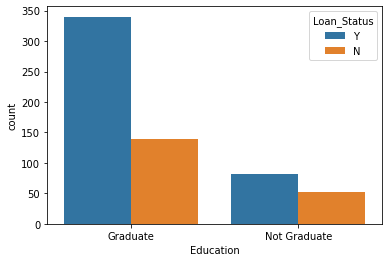

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.countplot(x='Education',hue='Loan_Status',data=df)

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

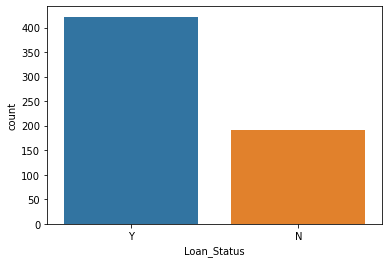

In [12]:
sns.countplot(x='Loan_Status',data=df)

<AxesSubplot:xlabel='Married', ylabel='count'>

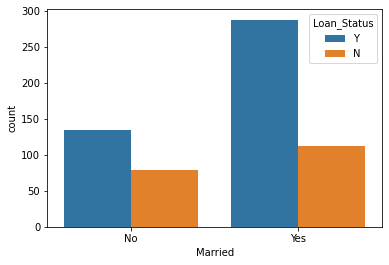

In [13]:
sns.countplot(x='Married',hue='Loan_Status',data=df)

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

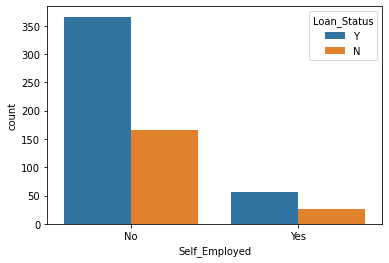

In [14]:
sns.countplot(x='Self_Employed',hue='Loan_Status',data=df)

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

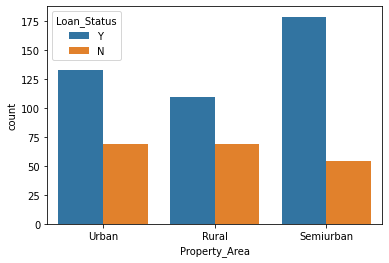

In [15]:
sns.countplot(x='Property_Area',hue='Loan_Status',data=df)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [17]:
df.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                      'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

we have converted categorical data into numerical values

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(6), object(2)
memory usage: 57.7+ KB


In [19]:
df.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)

In [20]:
df["Dependents"].value_counts()

0     345
1     102
2     101
3+     51
0      15
Name: Dependents, dtype: int64

In [ ]:
#it has unique value so we have to replce it with 4 and convert into int

In [21]:
df = df.replace(to_replace='3+', value=4)

In [22]:
df = df.astype({ "Dependents":'int64'})

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 57.7 KB


In [24]:
#checking correlation
df.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.165877,-0.045364,-0.000525,0.058809,0.082912,0.106404,-0.074030,0.009170,-0.025752,0.017987
Married,0.364569,1.000000,0.308408,-0.012304,0.004489,0.051708,0.075948,0.146212,-0.100912,0.010938,0.004257,0.091478
Dependents,0.165877,0.308408,1.000000,-0.059001,0.048028,0.134080,0.034780,0.170460,-0.104059,-0.047203,-0.012006,0.002474
Education,-0.045364,-0.012304,-0.059001,1.000000,0.010383,0.140760,0.062290,0.169436,0.073928,0.073658,0.065243,0.085884
Self_Employed,-0.000525,0.004489,0.048028,0.010383,1.000000,0.127180,-0.016100,0.114971,-0.033739,-0.001550,-0.030860,-0.003700
ApplicantIncome,0.058809,0.051708,0.134080,0.140760,0.127180,1.000000,-0.116605,0.564698,-0.046531,-0.018615,-0.009500,-0.004710
CoapplicantIncome,0.082912,0.075948,0.034780,0.062290,-0.016100,-0.116605,1.000000,0.189723,-0.059383,0.011134,0.010522,-0.059187
LoanAmount,0.106404,0.146212,0.170460,0.169436,0.114971,0.564698,0.189723,1.000000,0.037152,-0.000250,-0.047414,-0.031808
Loan_Amount_Term,-0.074030,-0.100912,-0.104059,0.073928,-0.033739,-0.046531,-0.059383,0.037152,1.000000,-0.004705,-0.076120,-0.022549
Credit_History,0.009170,0.010938,-0.047203,0.073658,-0.001550,-0.018615,0.011134,-0.000250,-0.004705,1.000000,0.001963,0.540556


In [25]:
df.corr()["Loan_Status"].sort_values(ascending=False)

Loan_Status          1.000000
Credit_History       0.540556
Married              0.091478
Education            0.085884
Property_Area        0.032112
Gender               0.017987
Dependents           0.002474
Self_Employed       -0.003700
ApplicantIncome     -0.004710
Loan_Amount_Term    -0.022549
LoanAmount          -0.031808
CoapplicantIncome   -0.059187
Name: Loan_Status, dtype: float64

as we can see credit history is higly correalted and CoapplicantIncome is negatively correlated

<AxesSubplot:>

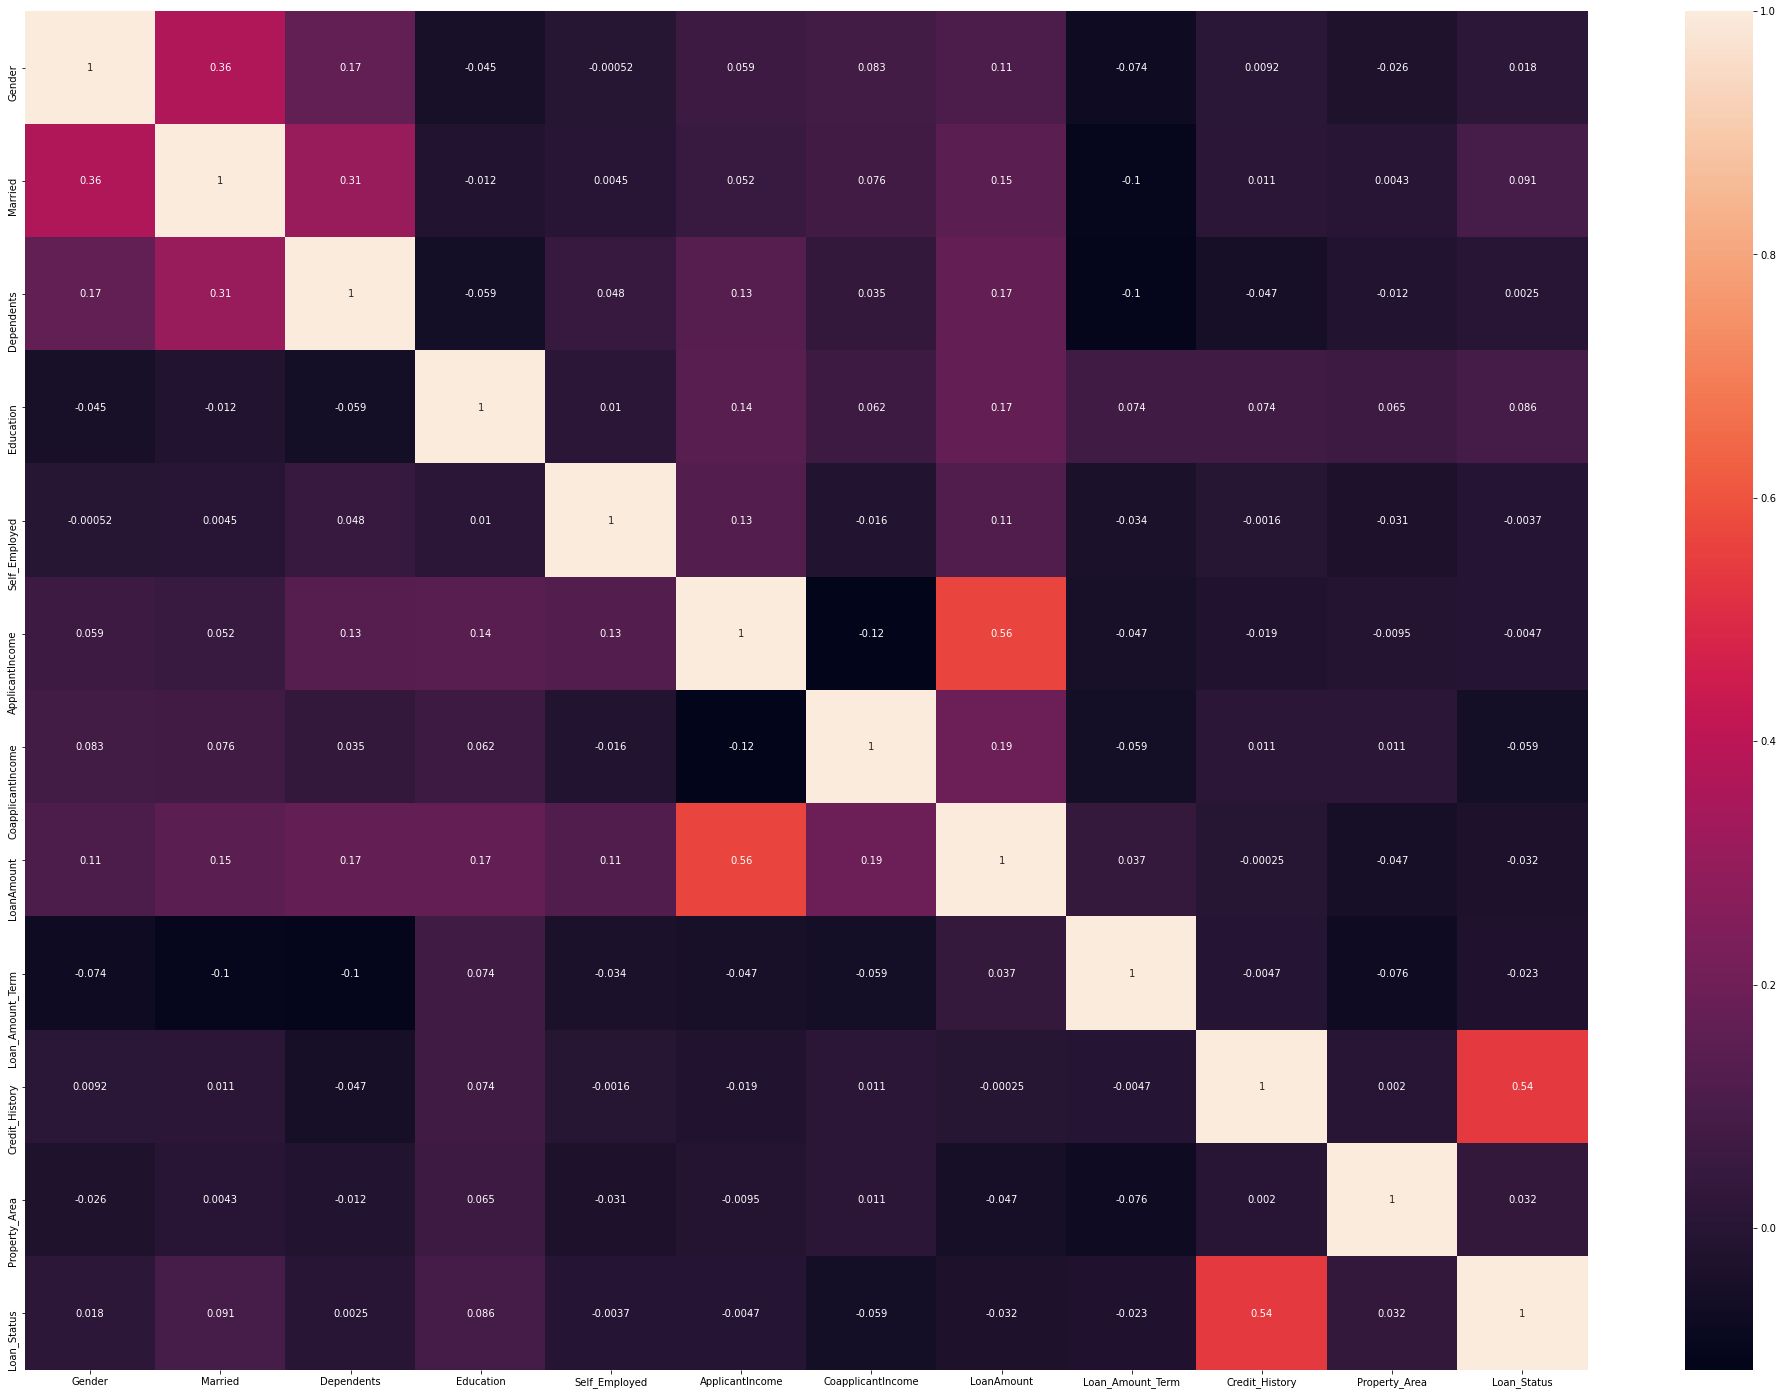

In [26]:
plt.figure(figsize=[35,25])
sns.heatmap(df.corr(),annot=True)

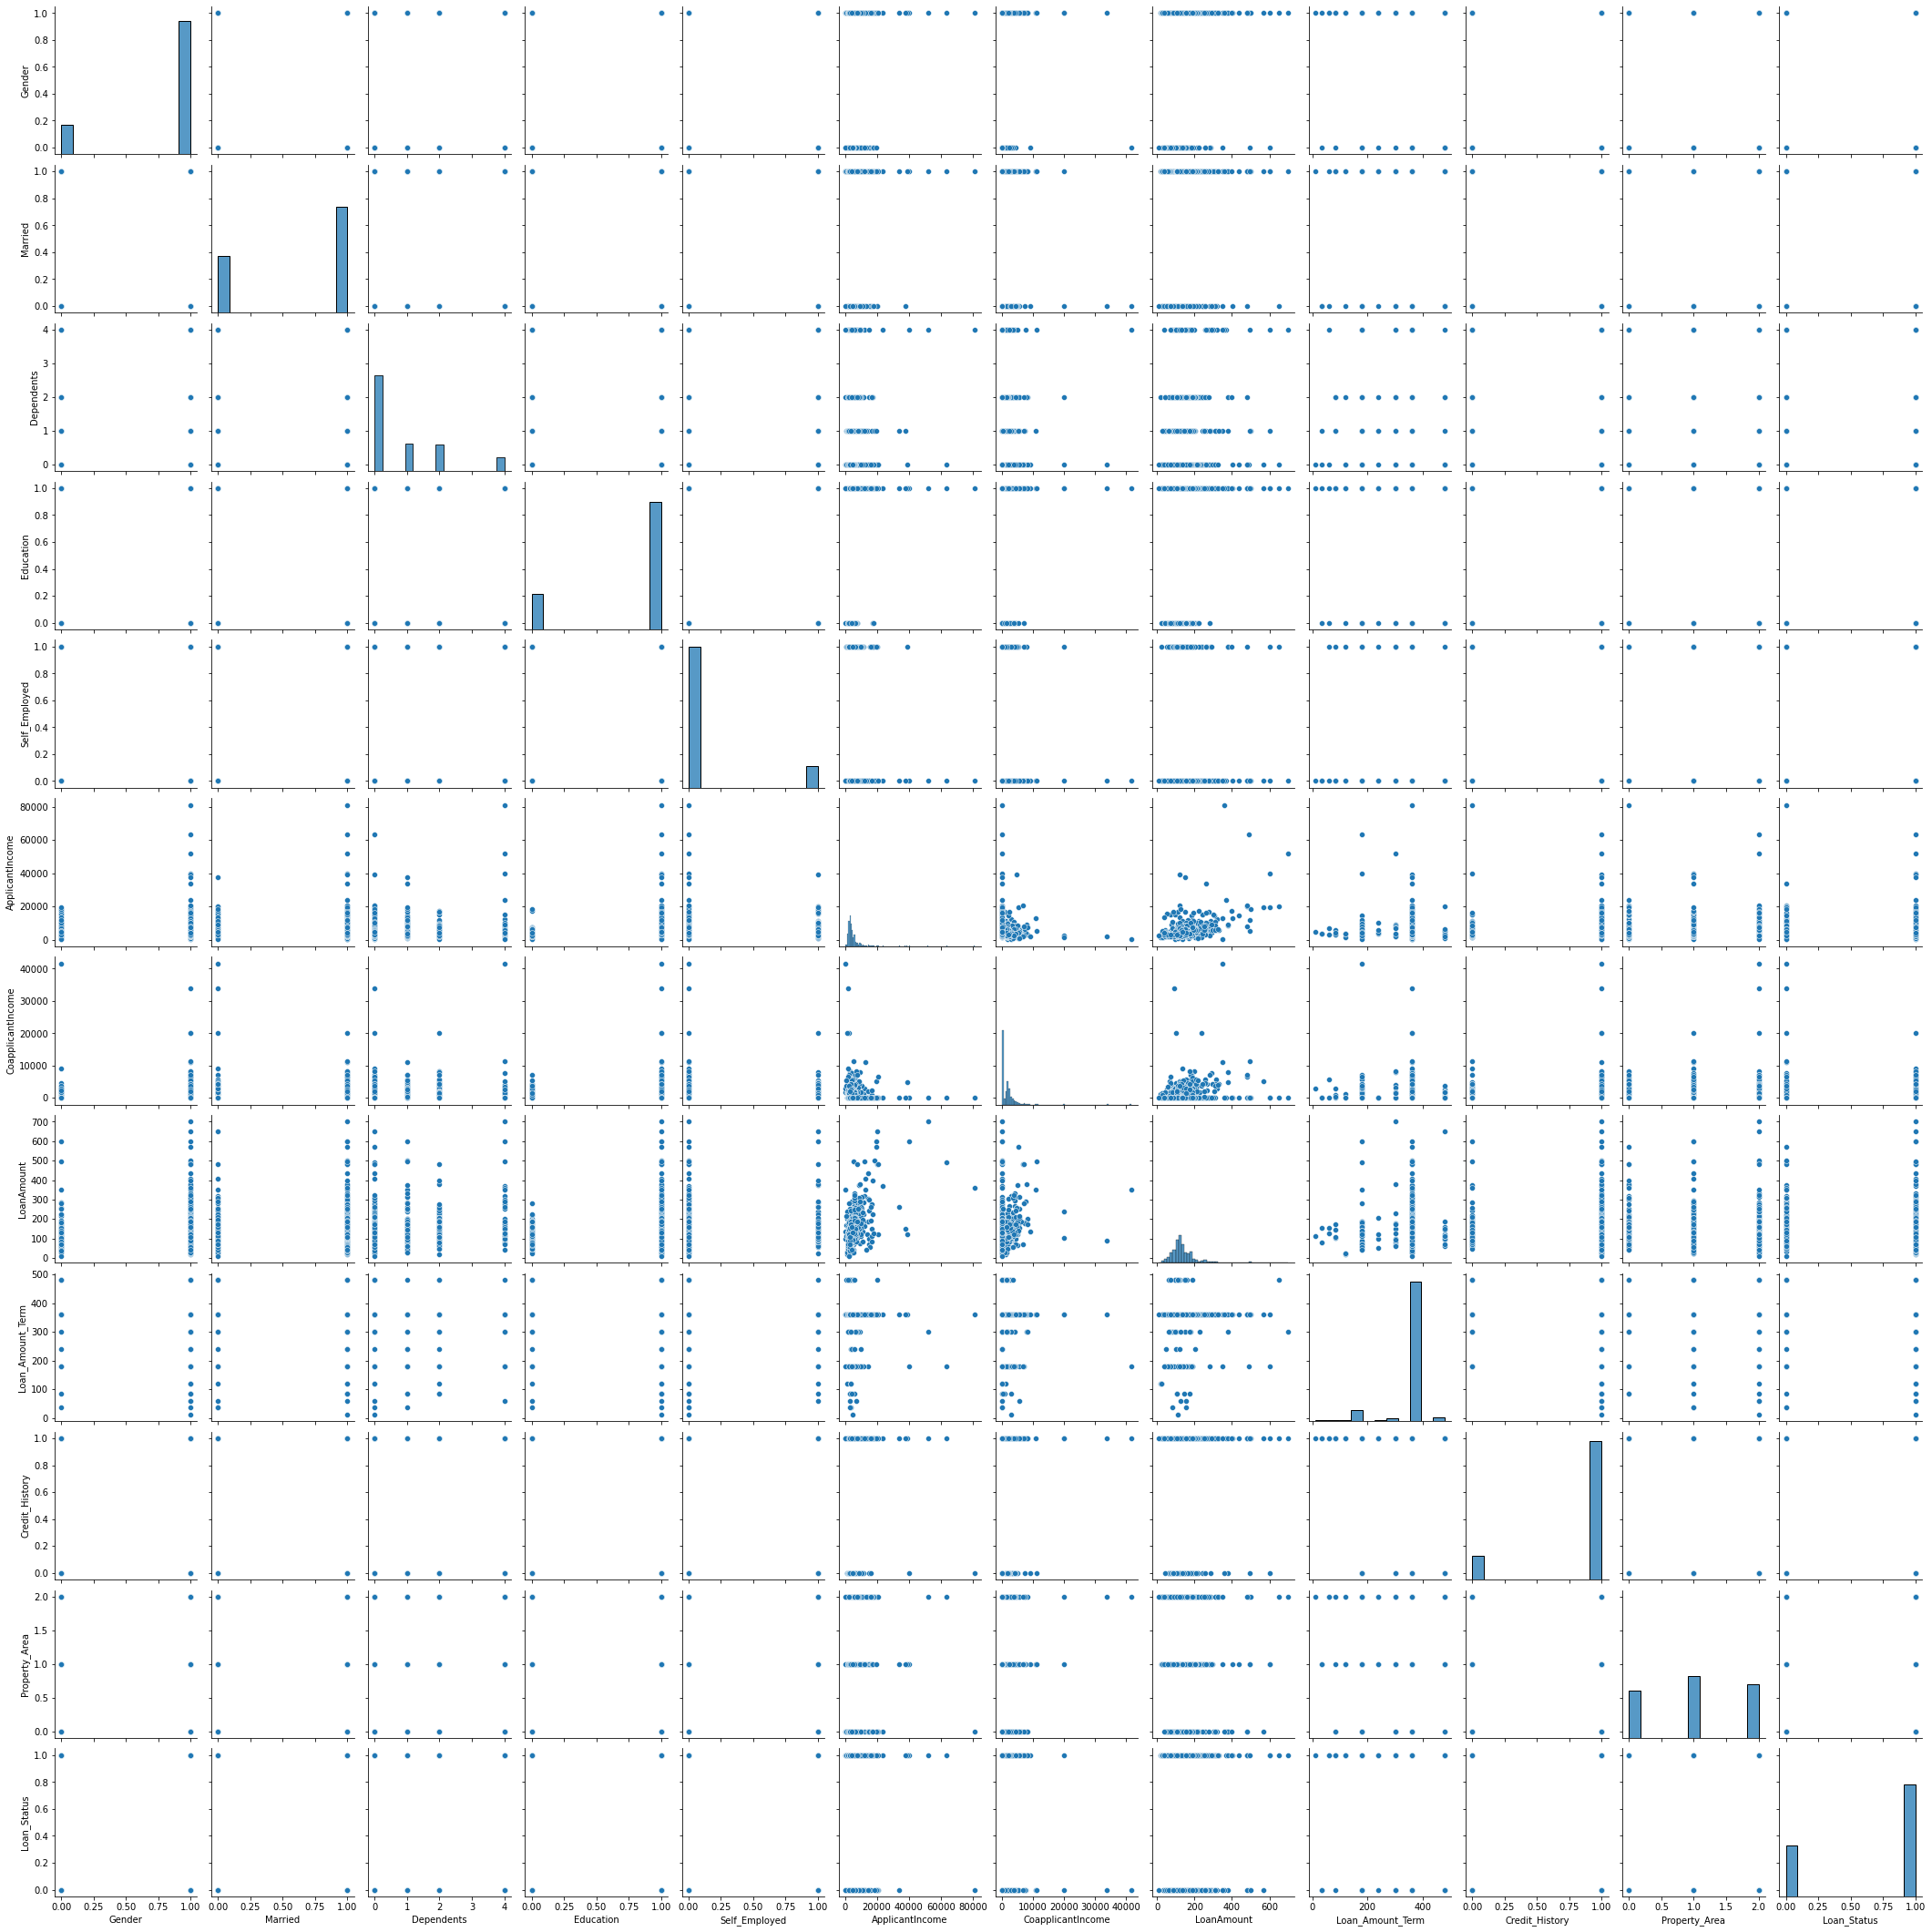

In [27]:
sns.pairplot(df)

<function matplotlib.pyplot.show(close=None, block=None)>

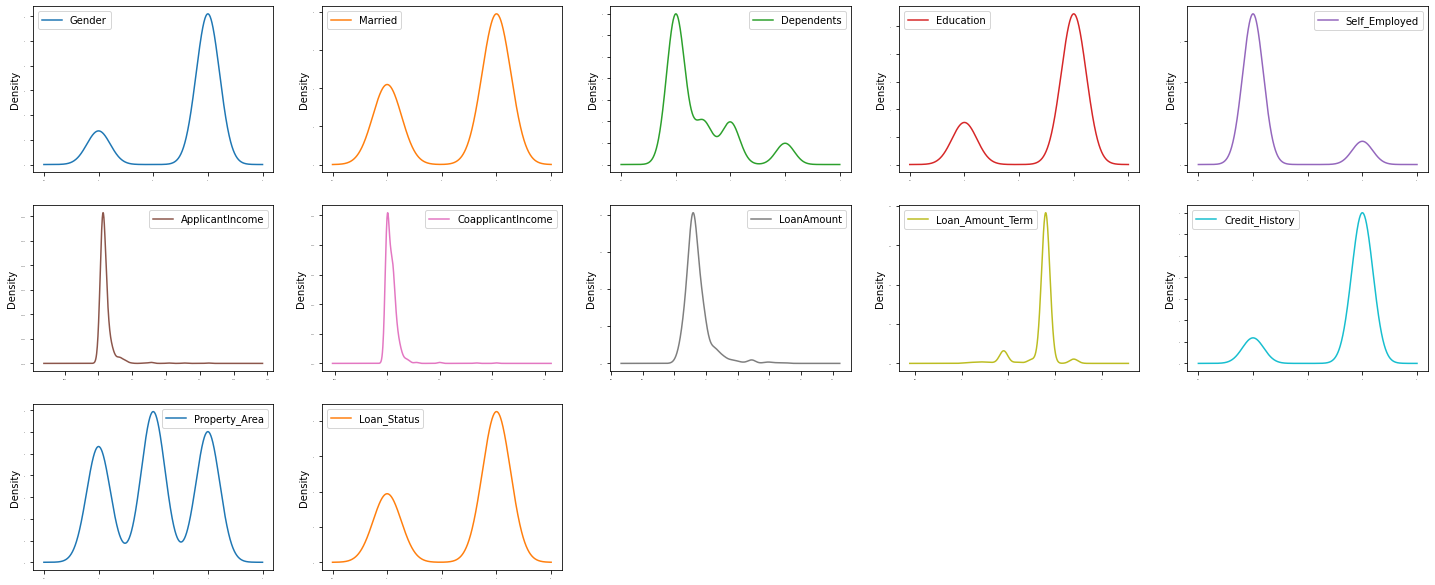

In [28]:
#checking distribution
df.plot(kind="density",subplots=True,layout=(7,5),sharex=False,fontsize=1,figsize=(25,25))
plt.show

In [29]:
#checking skewness
df.skew()

Gender              -1.648795
Married             -0.644850
Dependents           1.456965
Education           -1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.745407
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

Gender                   AxesSubplot(0.125,0.71587;0.168478x0.16413)
Married               AxesSubplot(0.327174,0.71587;0.168478x0.16413)
Dependents            AxesSubplot(0.529348,0.71587;0.168478x0.16413)
Education             AxesSubplot(0.731522,0.71587;0.168478x0.16413)
Self_Employed           AxesSubplot(0.125,0.518913;0.168478x0.16413)
ApplicantIncome      AxesSubplot(0.327174,0.518913;0.168478x0.16413)
CoapplicantIncome    AxesSubplot(0.529348,0.518913;0.168478x0.16413)
LoanAmount           AxesSubplot(0.731522,0.518913;0.168478x0.16413)
Loan_Amount_Term        AxesSubplot(0.125,0.321957;0.168478x0.16413)
Credit_History       AxesSubplot(0.327174,0.321957;0.168478x0.16413)
Property_Area        AxesSubplot(0.529348,0.321957;0.168478x0.16413)
Loan_Status          AxesSubplot(0.731522,0.321957;0.168478x0.16413)
dtype: object

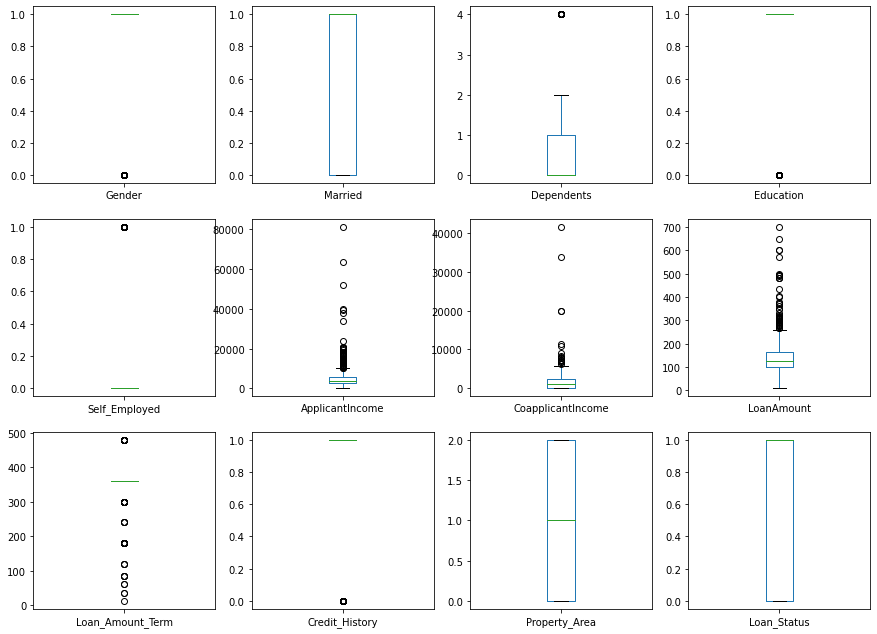

In [30]:
#checking outlier
df.plot(kind='box', figsize=(15,15), layout=(4,4), sharex=False, subplots=True)

now we have to remove outlier

In [31]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
        183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
        432, 443, 487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585,
        600, 604], dtype=int64),
 array([6, 8, 8, 8, 5, 7, 8, 5, 7, 5, 7, 6, 7, 5, 5, 8, 8, 7, 7, 8, 5, 7,
        7, 6, 5, 6, 7, 5, 7, 8, 8, 7, 7, 7, 8, 7, 8, 6, 8, 6, 7],
       dtype=int64))

In [32]:
df_new_z=df[(z<3).all(axis=1)]
df_new_z

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,5849,0.0,120.0,360.0,1.0,2,1
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,4,1,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,2,1


In [33]:
df_new_z.shape

(577, 12)

In [34]:
data_loss=((614-577)/614)*100

In [35]:
data_loss

6.026058631921824

In [ ]:
#our data loss is less so we can move further

In [36]:
df=df_new_z

In [37]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,5849,0.0,120.0,360.0,1.0,2,1
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,4,1,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,2,1


Gender                   AxesSubplot(0.125,0.71587;0.168478x0.16413)
Married               AxesSubplot(0.327174,0.71587;0.168478x0.16413)
Dependents            AxesSubplot(0.529348,0.71587;0.168478x0.16413)
Education             AxesSubplot(0.731522,0.71587;0.168478x0.16413)
Self_Employed           AxesSubplot(0.125,0.518913;0.168478x0.16413)
ApplicantIncome      AxesSubplot(0.327174,0.518913;0.168478x0.16413)
CoapplicantIncome    AxesSubplot(0.529348,0.518913;0.168478x0.16413)
LoanAmount           AxesSubplot(0.731522,0.518913;0.168478x0.16413)
Loan_Amount_Term        AxesSubplot(0.125,0.321957;0.168478x0.16413)
Credit_History       AxesSubplot(0.327174,0.321957;0.168478x0.16413)
Property_Area        AxesSubplot(0.529348,0.321957;0.168478x0.16413)
Loan_Status          AxesSubplot(0.731522,0.321957;0.168478x0.16413)
dtype: object

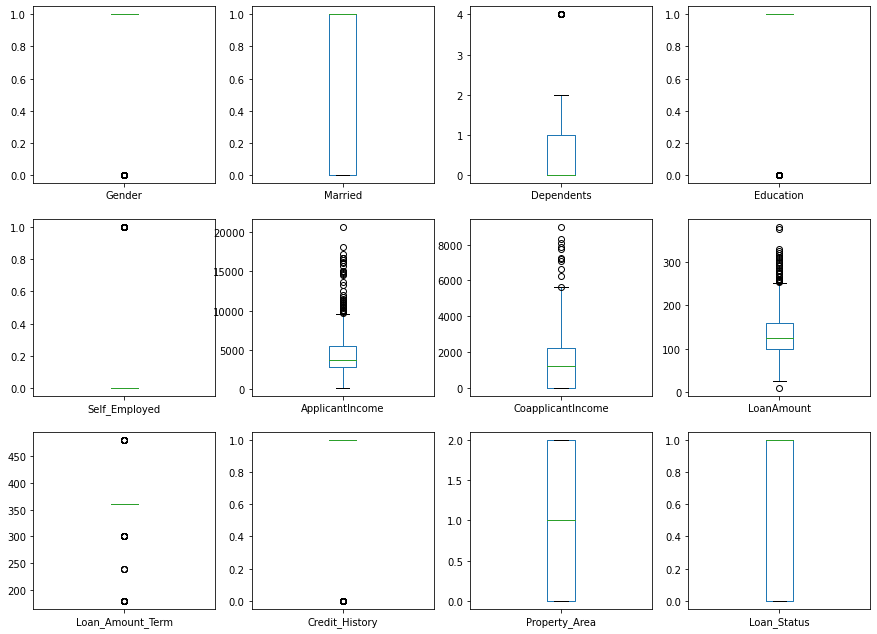

In [38]:
df.plot(kind='box', figsize=(15,15), layout=(4,4), sharex=False, subplots=True)

In [39]:
x=df.drop(columns="Loan_Status")
y=df["Loan_Status"]

In [40]:
from sklearn.preprocessing import StandardScaler
sc =StandardScaler()
x_scaled=sc.fit_transform(x)
x=pd.DataFrame(x_scaled, columns=x.columns)

In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(x_scaled,i)for i in range(x_scaled.shape[1])]
vif["features"]=x.columns
vif

,vif,features
0,1.205309,Gender
1,1.322090,Married
2,1.154616,Dependents
3,1.073353,Education
4,1.071858,Self_Employed
5,1.621992,ApplicantIncome
6,1.457264,CoapplicantIncome
7,1.659236,LoanAmount
8,1.060535,Loan_Amount_Term
9,1.009423,Credit_History


In [ ]:
#there is  no column having more vif values

In [42]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

Applying several model

In [43]:
#logisticregression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix,roc_curve, roc_auc_score
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
print("Accuracy",accuracy_score(y_test, y_pred)*100)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy 83.62068965517241
[[14 19]
 [ 0 83]]
              precision    recall  f1-score   support

           0       1.00      0.42      0.60        33
           1       0.81      1.00      0.90        83

    accuracy                           0.84       116
   macro avg       0.91      0.71      0.75       116
weighted avg       0.87      0.84      0.81       116



In [44]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
print("Accuracy ",accuracy_score(y_test, y_pred)*100)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy  81.89655172413794
[[17 16]
 [ 5 78]]
              precision    recall  f1-score   support

           0       0.77      0.52      0.62        33
           1       0.83      0.94      0.88        83

    accuracy                           0.82       116
   macro avg       0.80      0.73      0.75       116
weighted avg       0.81      0.82      0.81       116



In [45]:
#DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)
print("Accuracy ",accuracy_score(y_test, y_pred)*100)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy  71.55172413793103
[[20 13]
 [20 63]]
              precision    recall  f1-score   support

           0       0.50      0.61      0.55        33
           1       0.83      0.76      0.79        83

    accuracy                           0.72       116
   macro avg       0.66      0.68      0.67       116
weighted avg       0.74      0.72      0.72       116



In [46]:
#GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
y_pred = gb.predict(x_test)
print("Accuracy ",accuracy_score(y_test, y_pred)*100)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy  75.86206896551724
[[14 19]
 [ 9 74]]
              precision    recall  f1-score   support

           0       0.61      0.42      0.50        33
           1       0.80      0.89      0.84        83

    accuracy                           0.76       116
   macro avg       0.70      0.66      0.67       116
weighted avg       0.74      0.76      0.74       116



In [47]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
y_pred = rfc.predict(x_test)
print("Accuracy ",accuracy_score(y_test, y_pred)*100)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy  82.75862068965517
[[17 16]
 [ 4 79]]
              precision    recall  f1-score   support

           0       0.81      0.52      0.63        33
           1       0.83      0.95      0.89        83

    accuracy                           0.83       116
   macro avg       0.82      0.73      0.76       116
weighted avg       0.83      0.83      0.81       116



In [48]:
#checking cross validatio score
from sklearn.model_selection import cross_val_score
scr=cross_val_score(lr, x, y, cv=5)
print("Cross validation score of Logistic Regression model :",scr.mean())

scr=cross_val_score(rfc, x, y, cv=5)
print("Cross validation score of Random Forest model :",scr.mean())

scr=cross_val_score(knn, x, y, cv=5)
print ("Cross validation score of knn model :",scr.mean())
      
scr=cross_val_score(gb, x, y, cv=5)
print ("Cross validation score of gb model :",scr.mean())

scr=cross_val_score(dt, x, y, cv=5)
print ("Cross validation score of dt model :",scr.mean())

Cross validation score of Logistic Regression model : 0.8163418290854573
Cross validation score of Random Forest model : 0.7989955022488756
Cross validation score of knn model : 0.7973013493253374
Cross validation score of gb model : 0.7851724137931034
Cross validation score of dt model : 0.7244827586206897


As logistic regression has highest accuracy so we will hyoertuned it

In [49]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10, random_state = 6,shuffle=True)

In [50]:
lr_params = {'penalty':('l1', 'l2'), 
          'C':(0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10)}

In [51]:
from sklearn.model_selection import GridSearchCV
grid_lr = GridSearchCV(lr, lr_params, cv= kfold)
grid_lr.fit(x_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=6, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': (0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10),
                         'penalty': ('l1', 'l2')})

In [52]:
lr_res = grid_lr.cv_results_

In [53]:
best_lr_model = grid_lr.best_estimator_
best_lr_model

LogisticRegression(C=0.01)

In [54]:
grid_lr.best_score_

0.8115171137835338

In [55]:
auc=roc_auc_score(y_test,y_pred)
auc

0.7334793720335888

In [64]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred)

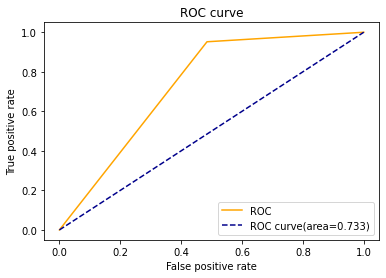

In [65]:
#checking auc,roc graph
plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC curve(area=%0.3f)'%auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend()
plt.show()

In [66]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.52      0.63        33
           1       0.83      0.95      0.89        83

    accuracy                           0.83       116
   macro avg       0.82      0.73      0.76       116
weighted avg       0.83      0.83      0.81       116



conclusion

we have get accuray of 83% and we have selected logistic regression model